### Breast cancer is the second leading cause of death in women. As the use of data in healthcare is very common today, we can use machine learning to predict whether a patient will survive a deadly disease or not.
We have a dataset of breast cancer patients who underwent surgery for the treatment of breast cancer. Below is the information of all columns in the dataset:
Patient_ID: ID of the patient // Age: Age of the patient // Gender: Gender of the patient // Protein1, Protein2, Protein3, Protein4: expression levels // Tumor_Stage: Breast cancer stage of the patient // Histology: Infiltrating Ductal Carcinoma, Infiltration Lobular Carcinoma, Mucinous Carcinoma // ER status: Positive/Negative // PR status: Positive/Negative // HER2 status: Positive/Negative // Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other // DateofSurgery: The date of Surgery // DateofLast_Visit: The date of the last visit of the patient // Patient_Status: Alive/Dead
our task is to predict whether a breast cancer patient will survive or not after the surgery.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report 

In [2]:
df = pd.read_csv('BRCA.csv')
print(df.head())

     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Mo

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [4]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [5]:
df.isna().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [8]:
df.groupby(['Gender', 'Tumour_Stage'])['Patient_Status'].value_counts()

Gender  Tumour_Stage  Patient_Status
FEMALE  I             Alive              51
                      Dead                9
        II            Alive             142
                      Dead               35
        III           Alive              59
                      Dead               17
MALE    II            Alive               2
                      Dead                1
        III           Alive               1
Name: Patient_Status, dtype: int64

In [9]:
type_I_status = df[df['Tumour_Stage'] == 'I']
type_I_status.reset_index(drop = True)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-AC-A8OR,75.0,FEMALE,0.171640,0.029656,-0.158900,0.674710,I,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Simple Mastectomy,24-Feb-17,05-Apr-17,Alive
1,TCGA-AO-A03V,41.0,FEMALE,0.142520,1.082700,0.210920,0.974280,I,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Simple Mastectomy,06-Mar-17,09-Aug-19,Alive
2,TCGA-A8-A095,45.0,FEMALE,-0.595180,-0.340540,0.444540,0.753280,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Mar-17,23-Sep-20,Alive
3,TCGA-AR-A24S,61.0,FEMALE,-0.227880,1.790800,-0.756210,0.739770,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,25-Apr-17,26-Jun-22,Alive
4,TCGA-D8-A4Z1,68.0,FEMALE,0.649030,1.424000,-0.395360,1.184800,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,07-Dec-17,18-Jul-18,Dead
5,TCGA-OL-A6VR,48.0,FEMALE,0.232350,1.212900,0.052518,-0.024126,I,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Simple Mastectomy,17-Dec-17,13-Apr-20,Alive
6,TCGA-EW-A1PF,50.0,FEMALE,-0.079765,2.622900,0.049687,-0.039369,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,27-Dec-17,16-May-18,Alive
7,TCGA-BH-A18K,46.0,FEMALE,-0.552140,2.083600,0.416050,-0.807910,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,27-Dec-17,02-Dec-18,Dead
8,TCGA-BH-A8FY,87.0,FEMALE,0.708760,2.173100,-0.439670,-0.392550,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,25-May-17,15-Jan-18,Dead
9,TCGA-A8-A08A,89.0,FEMALE,-0.249780,-0.351330,-0.099624,0.758340,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,24-Jun-17,24-Jul-17,Alive


Text(0.5, 1.0, 'type I survival / death')

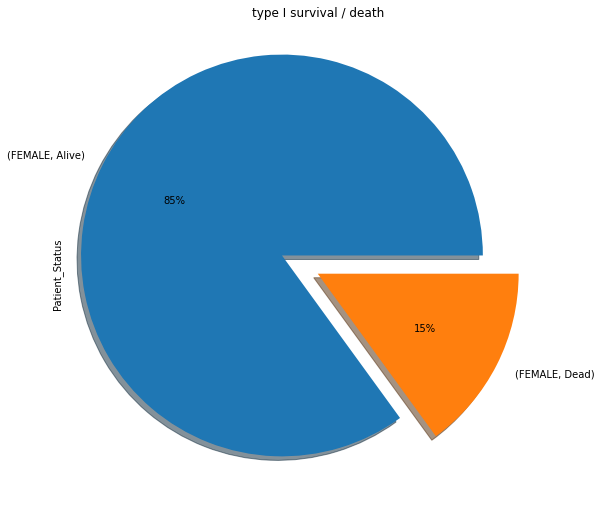

In [10]:
type_I_status.groupby('Gender')['Patient_Status'].value_counts().plot.pie(explode = [0.2, 0], autopct='%.0f%%', shadow = True, figsize=(9, 10))
plt.title('type I survival / death')

In [11]:
type_II_status = df[df['Tumour_Stage'] == 'II']
type_II_status.reset_index(drop = True)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
1,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
2,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
3,TCGA-D8-A73X,53.0,FEMALE,-0.069535,1.41830,-0.36105,0.391580,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Feb-17,07-Feb-18,Alive
4,TCGA-EW-A1P5,77.0,FEMALE,-0.151750,-0.66332,1.18940,0.217180,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,28-Sep-17,28-Sep-18,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,TCGA-BH-A0BV,78.0,FEMALE,-0.917230,-0.64693,0.55259,0.458740,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,22-Oct-19,24-Mar-21,Alive
176,TCGA-AO-A1KO,46.0,FEMALE,-0.740140,-0.73755,0.72032,0.721820,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,01-Nov-19,22-Jan-21,Alive
177,TCGA-E2-A1B5,46.0,FEMALE,-0.055036,-0.50643,0.88778,-0.089424,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,22-Oct-19,09-Feb-21,Dead
178,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead


Text(0.5, 1.0, 'type II survival / death')

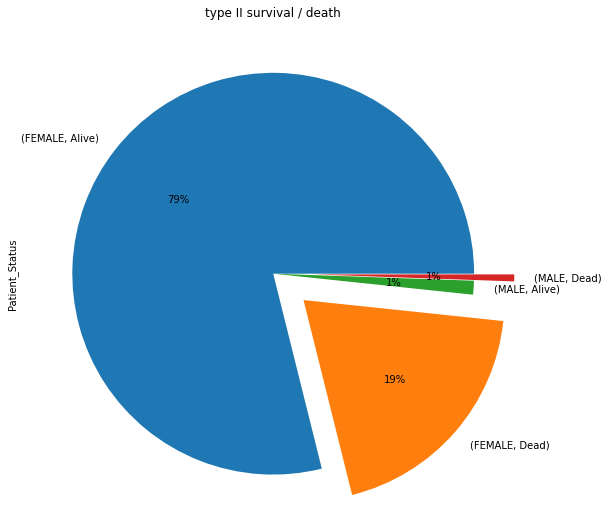

In [12]:
type_II_status.groupby('Gender')['Patient_Status'].value_counts().plot.pie(explode = [0, 0.2, 0, 0.2], autopct='%.0f%%', figsize=(9, 10))
plt.title('type II survival / death')

In [13]:
type_III_status = df[df['Tumour_Stage'] == 'III']
type_III_status.reset_index(drop = True)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.426380,0.547150,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-A8-A079,69.0,FEMALE,0.213980,1.311400,-0.327470,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
2,TCGA-AO-A1KQ,84.0,MALE,-0.081872,1.724100,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,18-Sep-17,15-Nov-21,Alive
3,TCGA-E2-A1B4,74.0,FEMALE,-0.246130,1.495300,-0.298540,0.659250,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,25-Jun-17,23-Dec-19,Alive
4,TCGA-D8-A1JC,59.0,FEMALE,-0.330450,1.435300,-0.608000,-0.350700,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,27-Nov-17,24-May-18,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,TCGA-A8-A06Q,63.0,FEMALE,0.290590,0.812490,1.069100,-0.148570,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,03-Aug-19,03-Sep-19,Alive
73,TCGA-A2-A0YH,53.0,FEMALE,0.287080,3.402200,-0.328500,0.216190,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,03-Aug-19,16-Aug-20,Alive
74,TCGA-BH-A0BZ,59.0,FEMALE,-0.409510,0.037563,0.217800,-0.044665,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,02-Sep-19,28-Sep-20,Alive
75,TCGA-AR-A1AL,60.0,FEMALE,0.094585,1.000300,-0.225750,0.048602,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,01-Nov-19,28-Feb-21,Dead


Text(0.5, 1.0, 'type III survival / death')

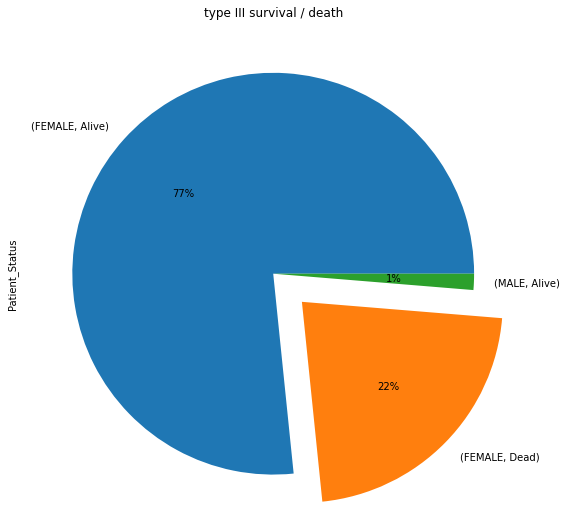

In [14]:
type_III_status.groupby('Gender')['Patient_Status'].value_counts().plot.pie(explode = [0, 0.2, 0], autopct='%.0f%%', figsize=(9, 10))
plt.title('type III survival / death')

Text(0.5, 1.0, 'Patients based on Histology')

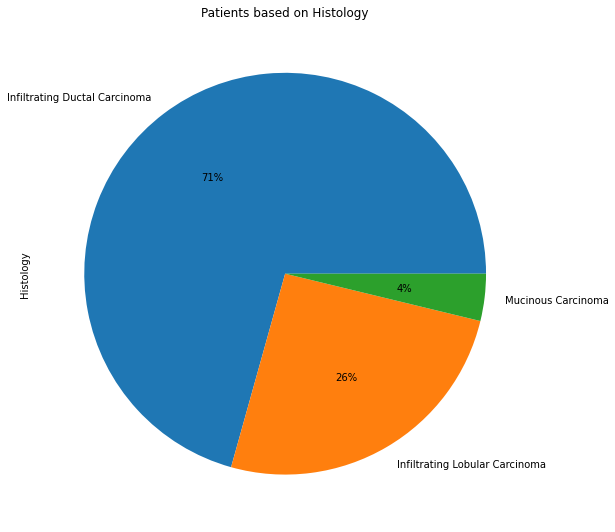

In [15]:
df['Histology'].value_counts().plot.pie(autopct='%.0f%%', figsize=(9, 10))
plt.title('Patients based on Histology')

<AxesSubplot:ylabel='Surgery_type'>

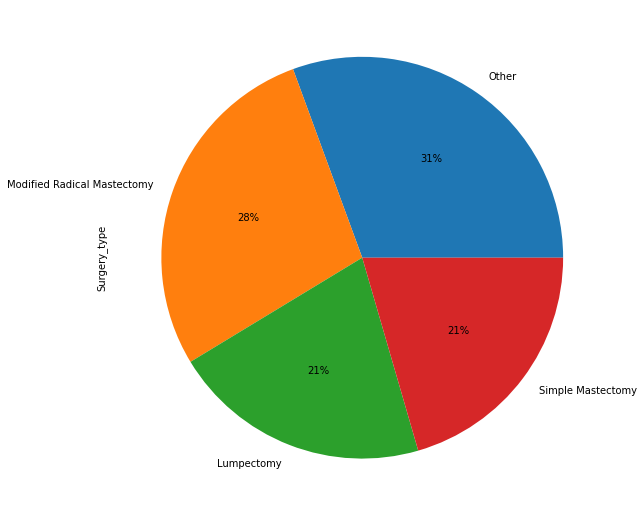

In [16]:
df['Surgery_type'].value_counts().plot.pie(autopct='%.0f%%', figsize=(9, 10))

In [17]:
data = df.copy()
data = data.drop(['Patient_ID', 'Date_of_Surgery', 'Date_of_Last_Visit'], axis = 1)
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead


In [18]:
# ER status of the patients
data['ER status'].value_counts()

Positive    317
Name: ER status, dtype: int64

In [19]:
# PR status of the patients
data['PR status'].value_counts()

Positive    317
Name: PR status, dtype: int64

In [20]:
# HER2 status of the patients
data['HER2 status'].value_counts()

Negative    288
Positive     29
Name: HER2 status, dtype: int64

In [21]:
X = pd.get_dummies(data.drop('Patient_Status', axis = 1), drop_first = True).values
y = data['Patient_Status'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
scaler = StandardScaler()

In [24]:
logreg = LogisticRegression()

In [25]:
pipeline = make_pipeline(scaler, logreg)

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [27]:
y_pred = pipeline.predict(X_test)

In [28]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[80  0]
 [16  0]]
              precision    recall  f1-score   support

       Alive       0.83      1.00      0.91        80
        Dead       0.00      0.00      0.00        16

    accuracy                           0.83        96
   macro avg       0.42      0.50      0.45        96
weighted avg       0.69      0.83      0.76        96

